In [1]:
import pandas as pd
import numpy as np
import seaborn as seaborn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


#### Take a classfication dataset, preprocessing and feature selection
#### Take any 3 models , train, evaluaate each one and compare

## Q1) 

In [2]:
from sklearn.datasets import load_iris

data = load_iris()

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Q2)

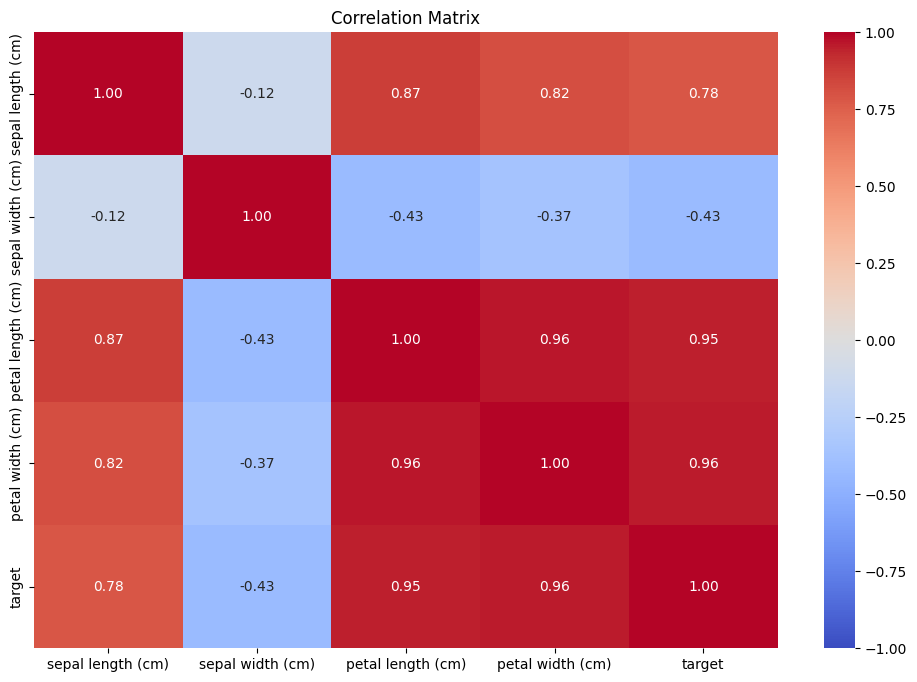

In [8]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [9]:
t = 0.75
target_corr = corr_matrix['target']
low_corr_features = target_corr[abs(target_corr) < t].index
df1 = df.drop(columns=low_corr_features)
print("Before: ",len(df.columns),'\nAfter: ',len(df1.columns))

Before:  5 
After:  4


In [10]:
df1

,sepal length (cm),petal length (cm),petal width (cm),target
0,5.1,1.4,0.2,0
1,4.9,1.4,0.2,0
2,4.7,1.3,0.2,0
3,4.6,1.5,0.2,0
4,5.0,1.4,0.2,0
...,...,...,...,...
145,6.7,5.2,2.3,2
146,6.3,5.0,1.9,2
147,6.5,5.2,2.0,2
148,6.2,5.4,2.3,2


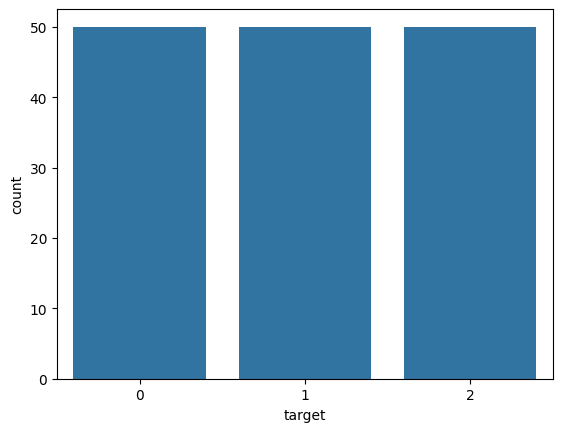

In [11]:
sns.countplot(x='target', data=df1) 
plt.show()


#### Thus it's a balanced dataset as it contains all the species of iris equally across dataset.

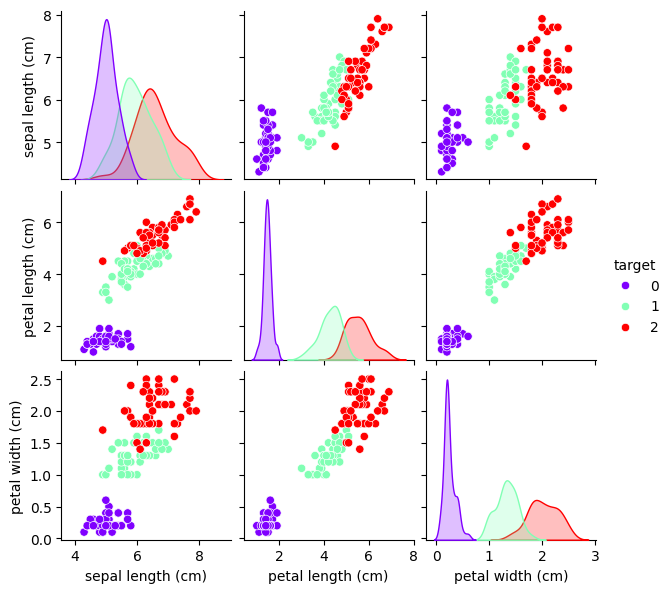

In [12]:
sns.pairplot(df1,hue='target', height=2,palette='rainbow')

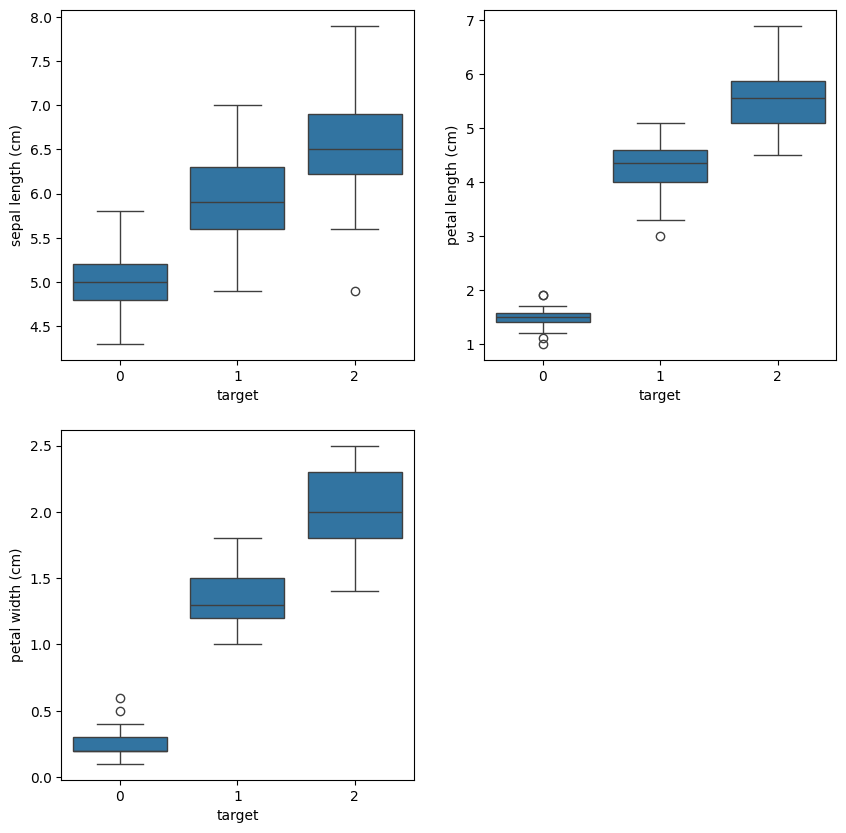

In [13]:
def graph(y): 
    sns.boxplot(x="target", y=y, data=df1) 
  
plt.figure(figsize=(10,10)) 
plt.subplot(221) 
graph('sepal length (cm)') 
plt.subplot(222) 
graph('petal length (cm)') 
plt.subplot(223) 
graph('petal width (cm)') 
  
plt.show()


## Q3)

In [14]:
from sklearn.model_selection import train_test_split

X = df1.drop(columns='target')
y = df1['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

In [15]:
X,y

(     sepal length (cm)  petal length (cm)  petal width (cm)
 0                  5.1                1.4               0.2
 1                  4.9                1.4               0.2
 2                  4.7                1.3               0.2
 3                  4.6                1.5               0.2
 4                  5.0                1.4               0.2
 ..                 ...                ...               ...
 145                6.7                5.2               2.3
 146                6.3                5.0               1.9
 147                6.5                5.2               2.0
 148                6.2                5.4               2.3
 149                5.9                5.1               1.8
 
 [150 rows x 3 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 145    2
 146    2
 147    2
 148    2
 149    2
 Name: target, Length: 150, dtype: int64)

## Q4-5) Model selection and Training and Evalation

Model 1: Random Forest, 
Model 2: k-Nearest Neighbors (k-NN), 
Model 3: logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [17]:
from sklearn.metrics import accuracy_score, classification_report

### Model 4.1: Random Forest

In [18]:
rf = RandomForestClassifier(random_state=22)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=22)

In [19]:
y_pred = rf.predict(X_test)
print(f"\n Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


 Random Forest Performance:
Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.91      1.00      0.95        10
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### Model 2:  Logistic Regression

In [20]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [21]:
y_pred_lr = lr.predict(X_test)
print(f"\n Logistic Regeression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


 Logistic Regeression Performance:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Model 3: KNN 

In [22]:

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
y_pred_knn = knn.predict(X_test)
print(f"\n Logistic Regeression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


 KNN Performance:
Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.90      0.95        10
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [45]:
print(f"Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print(f"\n Logistic Regeression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

print(f"\n KNN Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

Random Forest Performance:
Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.91      1.00      0.95        10
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


 Logistic Regeression Performance:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


 KNN Performance:
Accuracy: 0.9666666666666667

Classification Report:
          

## Q6) Visualization, Comparison, Intepretation

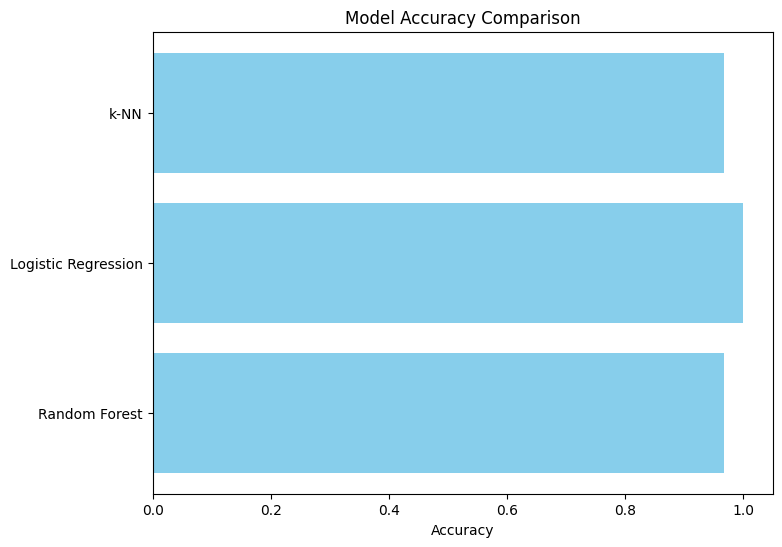

In [24]:
import matplotlib.pyplot as plt

m = {
    'Random Forest': rf,
    'Logistic Regression': lr, 
    'k-NN': knn
}

# Calculate accuracies for each model
accuracies = {model_name: accuracy_score(y_test, model.predict(X_test)) for model_name, model in m.items()}


plt.figure(figsize=(8, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

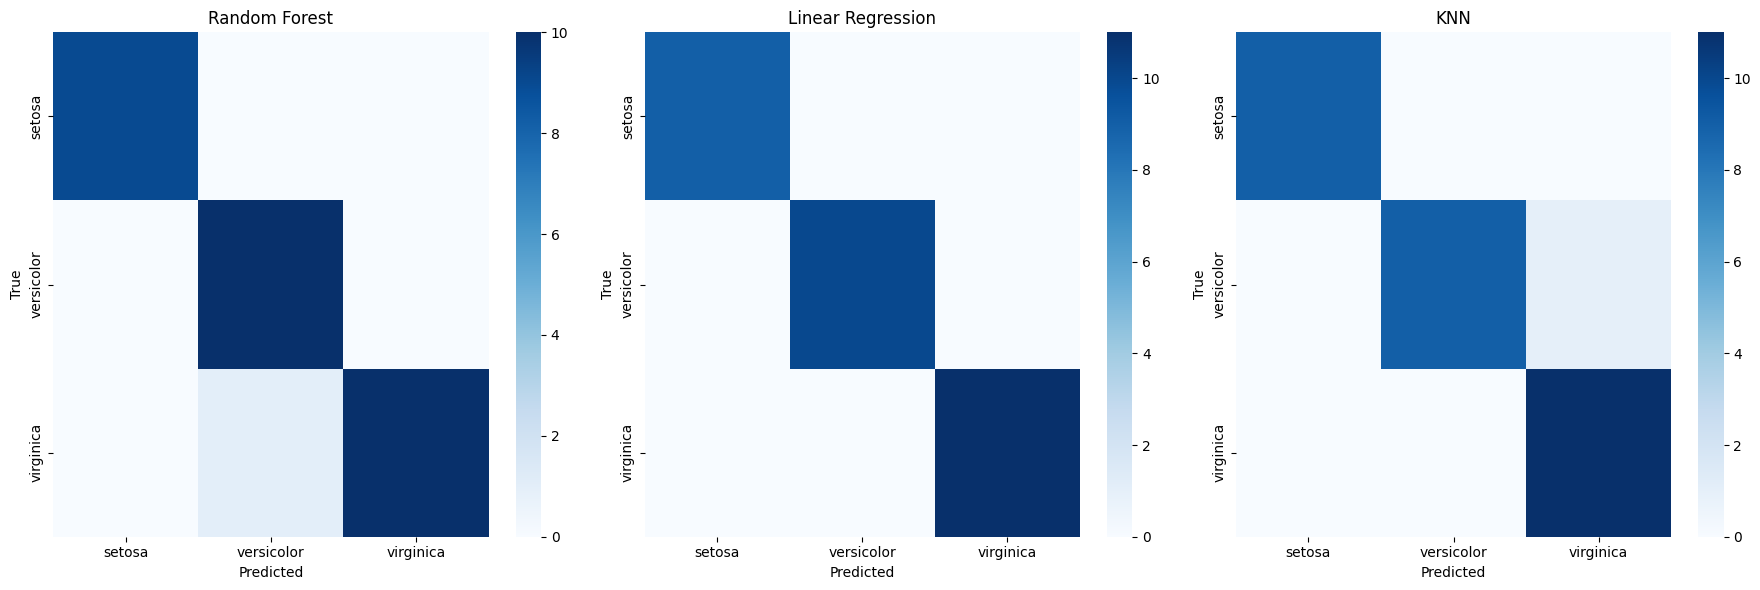

In [30]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test,y_pred )
cm_lr = confusion_matrix(y_test,y_pred_lr )
cm_knn = confusion_matrix(y_test,y_pred_knn)

fig, axes = plt.subplots(1,3, figsize=(18,6))
sns.heatmap(cm_rf,fmt='d',cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names, ax=axes[0])
axes[0].set_title('Random Forest')
axes[0].set_ylabel('True')
axes[0].set_xlabel('Predicted')

sns.heatmap(cm_lr,fmt='d',cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names, ax=axes[1])
axes[1].set_title('Linear Regression')
axes[1].set_ylabel('True')
axes[1].set_xlabel('Predicted')

sns.heatmap(cm_knn,fmt='d',cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names, ax=axes[2])
axes[2].set_title('KNN')
axes[2].set_ylabel('True')
axes[2].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

# Q7) Hyperprarameter & Cross Validation Tuning 

In [31]:
from sklearn.model_selection import GridSearchCV

In [33]:
rf_param_grid = {
    'n_estimators': [20, 40, 60],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 4]
}

log_reg_param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2'],
    'max_iter': [50, 100, 150]
}

knn_param_grid = {
    'n_neighbors': [3, 6, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [34]:
# Model 1: Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)
hpt_rf = rf_grid_search.best_estimator_

# <Model2 : Logistic Regression
lr_grid_search = GridSearchCV(LogisticRegression(), log_reg_param_grid, cv=5, n_jobs=-1, verbose=1)
lr_grid_search.fit(X_train, y_train)
hpt_lr = lr_grid_search.best_estimator_

# Model 3: k-NN
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, n_jobs=-1, verbose=1)
knn_grid_search.fit(X_train, y_train)
hpt_knn = knn_grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/om-college/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/om-college/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/om-college/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
hpt_rf_pred = hpt_rf.predict(X_test)
hpt_lr_pred = hpt_lr.predict(X_test)
hpt_knn_pred = hpt_knn.predict(X_test)

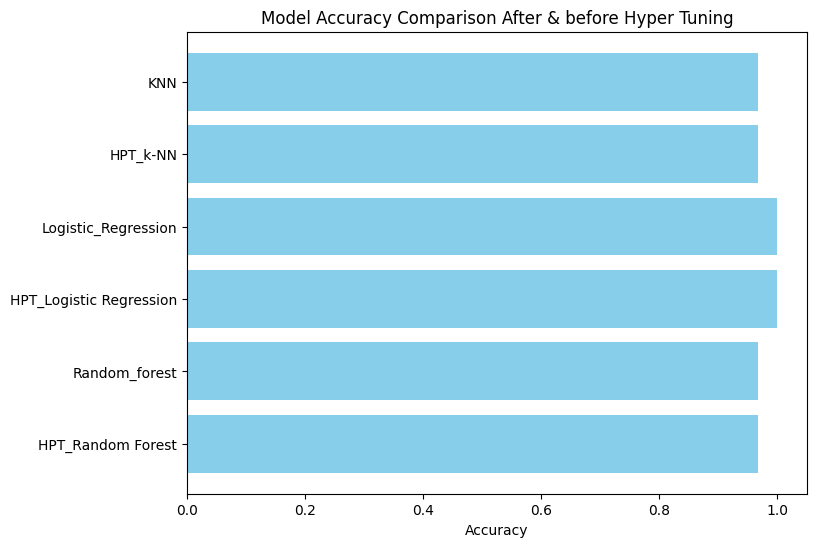

In [41]:
m = {
    'HPT_Random Forest': hpt_rf,
    'Random_forest' : rf,
    'HPT_Logistic Regression': hpt_lr, 
    'Logistic_Regression' : lr,
    'HPT_k-NN': hpt_knn,
    'KNN' : knn
}

# Calculate accuracies for each model
accuracies = {model_name: accuracy_score(y_test, model.predict(X_test)) for model_name, model in m.items()}


plt.figure(figsize=(8, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison After & before Hyper Tuning')
plt.show()

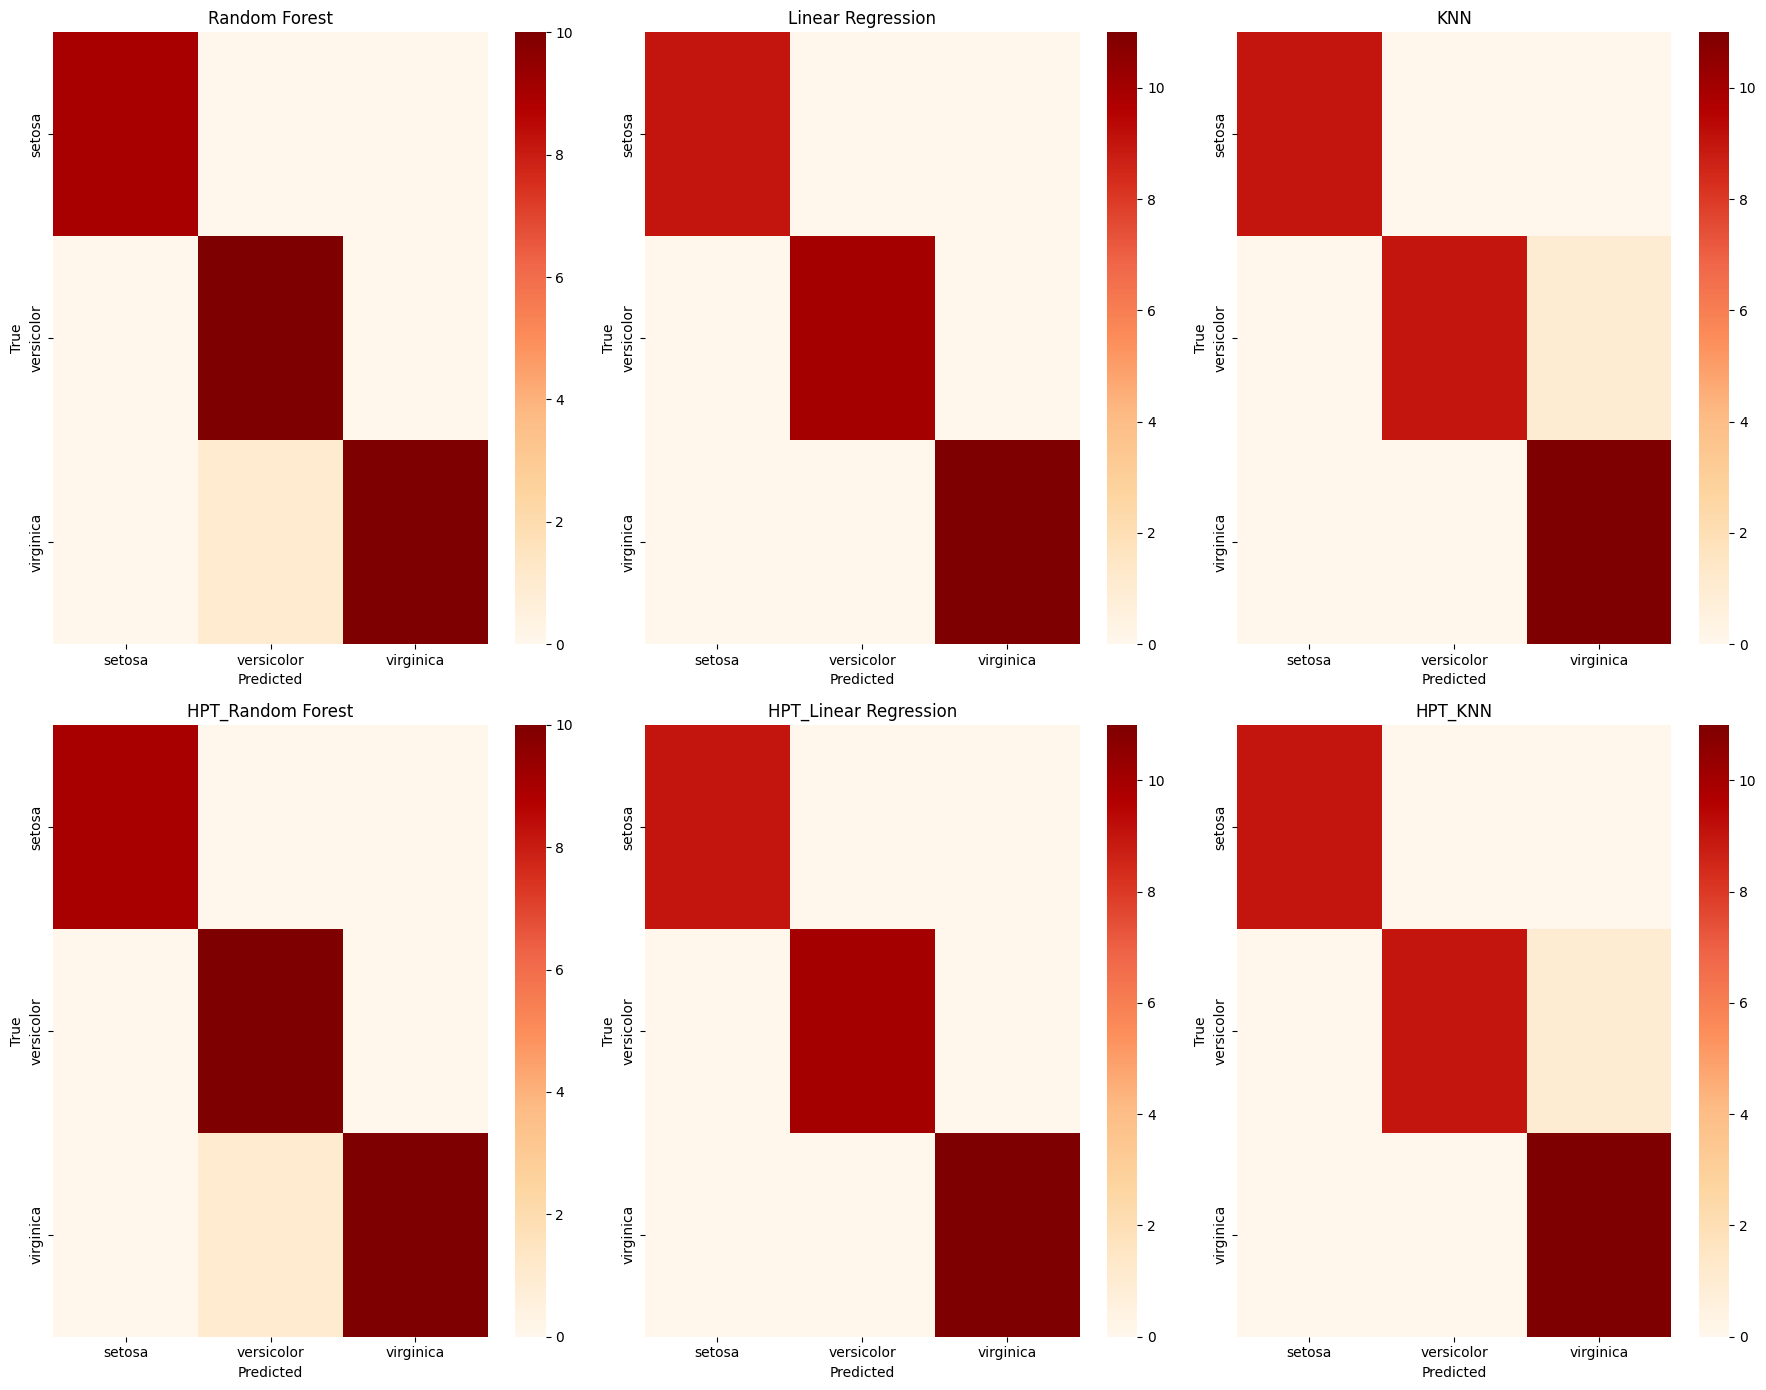

In [43]:
cm_rf = confusion_matrix(y_test,y_pred )
cm_lr = confusion_matrix(y_test,y_pred_lr )
cm_knn = confusion_matrix(y_test,y_pred_knn)

cm_hpt_rf = confusion_matrix(y_test,hpt_rf_pred )
cm_hpt_lr = confusion_matrix(y_test,hpt_lr_pred )
cm_hpt_knn = confusion_matrix(y_test,hpt_knn_pred)

fig, axes = plt.subplots(2,3, figsize=(18,14))
sns.heatmap(cm_rf,fmt='d',cmap='OrRd', xticklabels=data.target_names, yticklabels=data.target_names, ax=axes[0][0])
axes[0][0].set_title('Random Forest')
axes[0][0].set_ylabel('True')
axes[0][0].set_xlabel('Predicted')

sns.heatmap(cm_lr,fmt='d',cmap='OrRd', xticklabels=data.target_names, yticklabels=data.target_names, ax=axes[0][1])
axes[0][1].set_title('Linear Regression')
axes[0][1].set_ylabel('True')
axes[0][1].set_xlabel('Predicted')

sns.heatmap(cm_knn,fmt='d',cmap='OrRd', xticklabels=data.target_names, yticklabels=data.target_names, ax=axes[0][2])
axes[0][2].set_title('KNN')
axes[0][2].set_ylabel('True')
axes[0][2].set_xlabel('Predicted')

sns.heatmap(cm_hpt_rf,fmt='d',cmap='OrRd', xticklabels=data.target_names, yticklabels=data.target_names, ax=axes[1][0])
axes[1][0].set_title('HPT_Random Forest')
axes[1][0].set_ylabel('True')
axes[1][0].set_xlabel('Predicted')

sns.heatmap(cm_hpt_lr,fmt='d',cmap='OrRd', xticklabels=data.target_names, yticklabels=data.target_names, ax=axes[1][1])
axes[1][1].set_title('HPT_Linear Regression')
axes[1][1].set_ylabel('True')
axes[1][1].set_xlabel('Predicted')

sns.heatmap(cm_hpt_knn,fmt='d',cmap='OrRd', xticklabels=data.target_names, yticklabels=data.target_names, ax=axes[1][2])
axes[1][2].set_title('HPT_KNN')
axes[1][2].set_ylabel('True')
axes[1][2].set_xlabel('Predicted')

plt.tight_layout()
plt.show()